In [17]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv("emotions_cleaned.csv")
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [19]:
X = df.text
y = df.label
print(X.head())
print(y.head())

0        i just feel really helpless and heavy hearted
1    ive enjoyed being able to slouch about relax a...
2    i gave up my internship with the dmrg and am f...
3                           i dont know i feel so lost
4    i am a kindergarten teacher and i am thoroughl...
Name: text, dtype: object
0    4
1    0
2    4
3    0
4    4
Name: label, dtype: int64


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   label       416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10,
                                                    random_state =0)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(416809,)
(375128,)
(41681,)


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2))
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  1125805


In [23]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(375128, 1125805)
(41681, 1125805)


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[10490   842    54   345   248    23]
 [ 1760 11457   530   205   164    58]
 [  504  1362  1509    70    55     9]
 [ 1116   596    51  3852   213     6]
 [  835   502    31   258  2922   156]
 [  241   295    11    45   316   550]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.87      0.78     12002
           1       0.76      0.81      0.78     14174
           2       0.69      0.43      0.53      3509
           3       0.81      0.66      0.73      5834
           4       0.75      0.62      0.68      4704
           5       0.69      0.38      0.49      1458

    accuracy                           0.74     41681
   macro avg       0.73      0.63      0.66     41681
weighted avg       0.74      0.74      0.73     41681

Accuracy: 0.7384659677071087


Accuracy Score        :  0.7384659677071087


Classification Report : 
               precision    recall  f1-score   support

           0       0.70      0.87      0.78     12002
           1       0.76      0.81      0.78     14174
           2       0.69      0.43      0.53      3509
           3       0.81      0.66      0.73      5834
           4       0.75      0.62      0.68      4704
           5       0.69      0.38      0.49      1458

    accuracy                           0.74     41681
   macro avg       0.73      0.63      0.66     41681
weighted avg       0.74      0.74      0.73     41681



<Axes: >

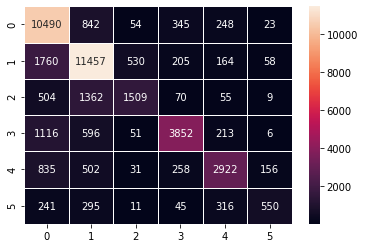

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print("Accuracy Score        : ",accuracy_score(y_test, ypred))
print("Classification Report : \n", classification_report(y_test, ypred))
cfm=confusion_matrix(y_test,ypred)
import seaborn as sns
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV

# hyperparameter tunning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],  # weighting schemes
    'metric': ['euclidean', 'manhattan']  # distance metrics
}

grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

KeyboardInterrupt: 

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'